In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from models import LSTNet
import importlib

from utils import *;
import Optim

#显示中文
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

data_path='D:/Codes/nCov/LSTNet-master/data/'

In [2]:
inputfile="D:/Codes/nCov/data/out_increase_province_2.20.csv"

# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)
# 设置value的显示长度为100，默认为50
pd.set_option('max_colwidth', 200)

#读取数据
dataf = pd.read_csv(inputfile, encoding='UTF-8')

In [33]:
#预测湖北省
later_5=pd.DataFrame()
for i in range(1,6):
    #读取模型
    with open('save_2/hubei_%s.pt'%(str(i)), 'rb') as f:
        model = torch.load(f)
    data_zj=pd.read_table('data/data_hubei.txt',header=None,sep=',')
    data_zj=data_zj[::-1]
    dt=data_zj.iloc[3:8,:]
    dt=dt[::-1]
    #预测的前5个值
    first_5=dt
    dt=dt.values
    dt=np.expand_dims(dt,axis=0)
    x=Variable(torch.FloatTensor(dt))
    y=model(x).data.numpy()
    later_5=later_5.append(pd.DataFrame(y))
print(later_5)

          0           1            2
0 -2.228494  157.335922 -1243.747070
0 -2.586249  156.800323 -1244.795166
0 -2.069928  158.099258 -1244.472900
0 -2.535487  157.366745 -1244.958252
0 -2.463484  158.325500 -1244.209229


In [34]:
#预测浙江省
later_5=pd.DataFrame()
for i in range(1,6):
    #读取模型
    with open('save_2/zhejiang_%s.pt'%(str(i)), 'rb') as f:
        model = torch.load(f)
    data_zj=pd.read_table('data/data_hubei.txt',header=None,sep=',')
    data_zj=data_zj[::-1]
    dt=data_zj.iloc[3:8,:]
    dt=dt[::-1]
    #预测的前5个值
    first_5=dt
    dt=dt.values
    dt=np.expand_dims(dt,axis=0)
    x=Variable(torch.FloatTensor(dt))
    y=model(x).data.numpy()
    later_5=later_5.append(pd.DataFrame(y))
print(later_5)

           0           1            2
0 -11.710867  157.503372 -1236.437500
0 -11.782688  158.251999 -1237.862183
0 -11.804534  159.128799 -1238.042480
0 -11.729091  159.358353 -1239.039062
0 -11.841128  160.147400 -1239.651123


In [28]:
print(later_5)

          0          1          2
0 -0.171795  14.376976  10.219653
0 -0.249247  14.735184   9.340220
0 -0.141204  15.614159   9.577433
0 -0.146285  15.473071   9.492915
0 -0.237153  15.934706   9.287643


In [29]:
predict_10=first_5.append(later_5).reset_index(drop=True)
print(predict_10)

          0          1          2
0  0.000000  28.000000  25.000000
1  0.000000  51.000000  14.000000
2  0.000000  39.000000  14.000000
3  0.000000  43.000000  10.000000
4  0.000000  25.000000   7.000000
5 -0.171795  14.376976  10.219653
6 -0.249247  14.735184   9.340220
7 -0.141204  15.614159   9.577433
8 -0.146285  15.473071   9.492915
9 -0.237153  15.934706   9.287643


In [30]:
#读取真实值
data_true=pd.read_table('data/data_zhejiang_2.20.txt',header=None,sep=',')
data_true=data_true.iloc[-10:,:].reset_index(drop=True)
print(data_true)

     0     1     2
0  0.0  28.0  25.0
1  0.0  51.0  14.0
2  0.0  39.0  14.0
3  0.0  43.0  10.0
4  0.0  25.0   7.0
5  0.0  28.0   5.0
6  0.0  51.0   4.0
7  0.0  28.0   1.0
8  0.0  69.0   2.0
9  1.0   9.0   1.0


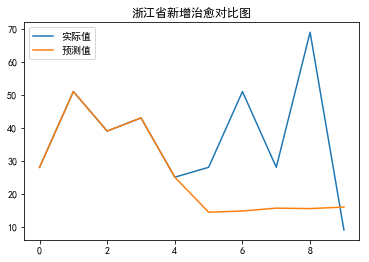

In [31]:
#显示新增治愈图像
plt.plot(data_true.iloc[:,1],label='实际值')
plt.plot(predict_10.iloc[:,1],label='预测值')
plt.legend()
plt.title('浙江省新增治愈对比图')
plt.savefig('figure_2/浙江省新增治愈对比图.png',dpi=500)

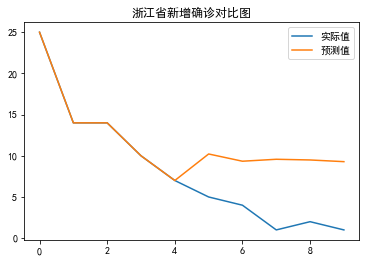

In [32]:
plt.plot(data_true.iloc[:,2],label='实际值')
plt.plot(predict_10.iloc[:,2],label='预测值')
plt.legend()
plt.title('浙江省新增确诊对比图')
plt.savefig('figure_2/浙江省新增确诊对比图.png',dpi=500)

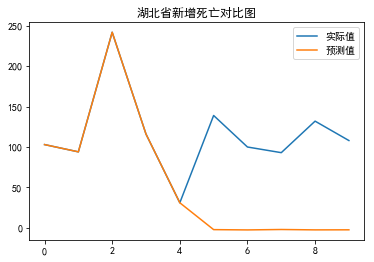

In [25]:
plt.plot(data_true.iloc[:,0],label='实际值')
plt.plot(predict_10.iloc[:,0],label='预测值')
plt.legend()
plt.title('湖北省新增死亡对比图')
plt.savefig('figure_2/湖北省新增死亡对比图.png',dpi=500)
